In [4]:
#pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c7/ef/925617d36c08e0bbdf4347a9b38974ce7ab8fdb5d1a5cf0e3f3c65ea43da/prophet-1.1.7-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/94/34/f308e49c14ff3fc7ecebfdcd54168b333fd218bbfd2eacf46af775bb4f69/holidays-0.75-py3-none-any.whl.metadata
  Using cached holidays-0.75-py3-none-any.whl.metadata (41 kB)
  Obtaining dependency information for importlib_resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhoste

In [2]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [3]:
df = pd.read_csv("tatasteel_stock.csv")

In [4]:
df.head()

,Date,Price,High,Low,Open,Volume
0,1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1,1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
2,1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
3,1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
4,1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405 entries, 0 to 7404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7405 non-null   object 
 1   Price   7405 non-null   float64
 2   High    7405 non-null   float64
 3   Low     7405 non-null   float64
 4   Open    7405 non-null   float64
 5   Volume  7405 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 347.2+ KB


In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405 entries, 0 to 7404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7405 non-null   datetime64[ns]
 1   Price   7405 non-null   float64       
 2   High    7405 non-null   float64       
 3   Low     7405 non-null   float64       
 4   Open    7405 non-null   float64       
 5   Volume  7405 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 347.2 KB


In [8]:
df_1 = df[["Date","Open"]]

In [9]:
df_1

,Date,Open
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [10]:
df_1.columns = ["ds","y"]

In [11]:
df_1

,ds,y
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [12]:
model = Prophet()

In [13]:
model.fit(df_1)

21:03:31 - cmdstanpy - INFO - Chain [1] start processing
21:03:36 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
future_dates = model.make_future_dataframe(periods = 365)

In [16]:
future_dates.tail()

,ds
7765,2026-06-22
7766,2026-06-23
7767,2026-06-24
7768,2026-06-25
7769,2026-06-26


In [17]:
df_1

,ds,y
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [18]:
prediction = model.predict(future_dates)

In [22]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7765,2026-06-22,179.186473,169.028026,198.690173,174.621846,183.035062,4.231394,4.231394,4.231394,4.082012,4.082012,4.082012,0.149381,0.149381,0.149381,0.0,0.0,0.0,183.417867
7766,2026-06-23,179.245739,169.064792,198.035822,174.658512,183.110804,4.213364,4.213364,4.213364,4.058935,4.058935,4.058935,0.154429,0.154429,0.154429,0.0,0.0,0.0,183.459102
7767,2026-06-24,179.305004,167.156636,196.525707,174.695178,183.203172,4.054647,4.054647,4.054647,3.895309,3.895309,3.895309,0.159338,0.159338,0.159338,0.0,0.0,0.0,183.359651
7768,2026-06-25,179.364270,168.962250,197.450268,174.734587,183.290074,4.083302,4.083302,4.083302,3.919626,3.919626,3.919626,0.163676,0.163676,0.163676,0.0,0.0,0.0,183.447572
7769,2026-06-26,179.423535,169.049598,197.998791,174.774207,183.365154,3.993671,3.993671,3.993671,3.826615,3.826615,3.826615,0.167056,0.167056,0.167056,0.0,0.0,0.0,183.417206


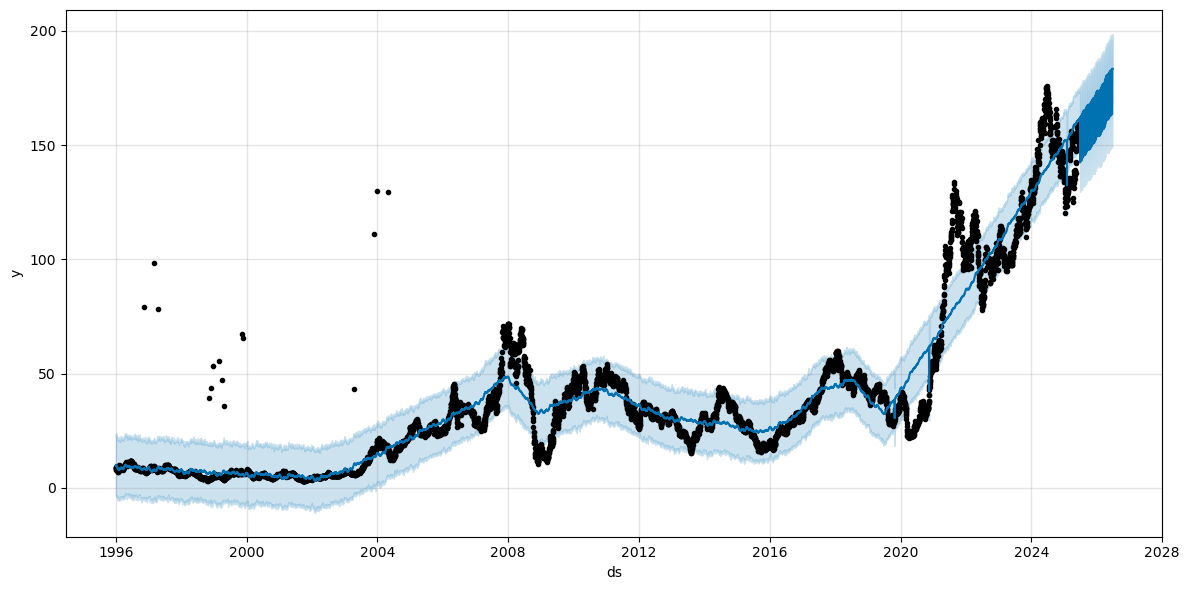

In [23]:
m_plot = model.plot(prediction,figsize = (12,6))

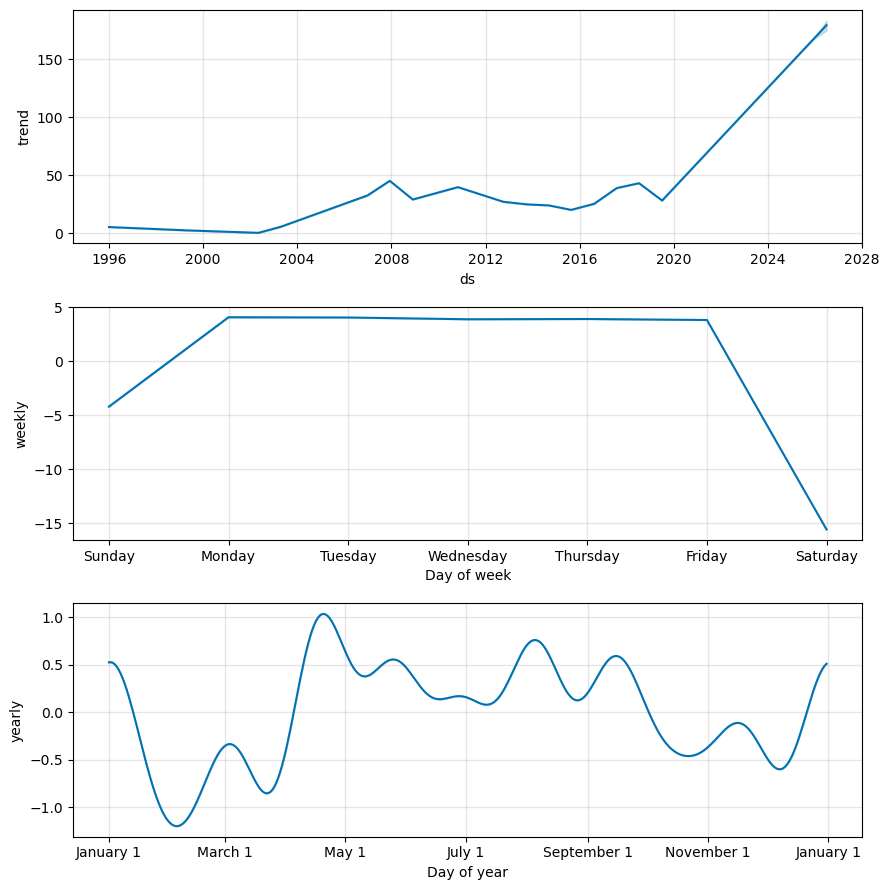

In [24]:
model_com = model.plot_components(prediction)

In [25]:
df_cv = cross_validation(model , initial = '730 days', period = '180 days', horizon = '365 days')
df_cv

  0%|          | 0/54 [00:00<?, ?it/s]

21:06:19 - cmdstanpy - INFO - Chain [1] start processing
21:06:19 - cmdstanpy - INFO - Chain [1] done processing
21:06:19 - cmdstanpy - INFO - Chain [1] start processing
21:06:19 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing
21:06:20 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing
21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:21 - cmdstanpy - INFO - Chain [1] start processing
21:06:21 - cmdstanpy - INFO - Chain [1] done processing
21:06:22 - cmdstanpy - INFO - Chain [1] start processing
21:06:22 - cmdstanpy - INFO - Chain [1] done processing
21:06:23 - cmdstanpy - INFO - Chain [1] start processing
21:06:23 - cmdstanpy - INFO - Chain [1] done processing
21:06:23 - cmdstanpy - INFO - Chain [1] start processing
21:06:24 - cmdstanpy - INFO - Chain [1] done processing
21:06:24 - cmdstanpy - INFO - Chain [1] start processing
21:06:24 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-15,6.472619,-0.509243,13.174629,6.942222,1998-05-14
1,1998-05-18,6.505773,-0.280091,13.414155,6.867793,1998-05-14
2,1998-05-19,6.539900,-0.457103,13.070088,6.901625,1998-05-14
3,1998-05-20,6.038491,-0.552259,13.227166,7.030183,1998-05-14
4,1998-05-21,6.110581,-0.696650,13.136860,7.003118,1998-05-14
...,...,...,...,...,...,...
13498,2025-06-20,155.254816,140.314068,169.841877,150.750000,2024-06-26
13499,2025-06-23,155.564349,140.814749,171.138887,150.500000,2024-06-26
13500,2025-06-24,155.511538,141.574145,171.369920,153.800003,2024-06-26
13501,2025-06-25,155.319775,140.637934,170.341269,155.899994,2024-06-26


In [26]:
df_p = performance_metrics(df_cv)

In [27]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,231.793036,15.224751,9.627835,0.279621,0.226804,0.267547,0.619031
1,38 days,230.290723,15.175333,9.606272,0.278496,0.226804,0.267056,0.620100
2,39 days,233.287568,15.273754,9.645348,0.279580,0.227759,0.267418,0.619835
3,40 days,229.045994,15.134266,9.593166,0.277575,0.227141,0.265908,0.619780
4,41 days,229.215282,15.139857,9.618027,0.280141,0.226514,0.266845,0.618575
...,...,...,...,...,...,...,...,...
324,361 days,373.868875,19.335689,12.726821,0.388259,0.282710,0.372238,0.539259
325,362 days,377.832555,19.437915,12.808887,0.390668,0.285752,0.374836,0.535556
326,363 days,381.430776,19.530253,12.863411,0.392628,0.286481,0.376525,0.535166
327,364 days,380.715024,19.511920,12.836456,0.389592,0.286018,0.375123,0.535556


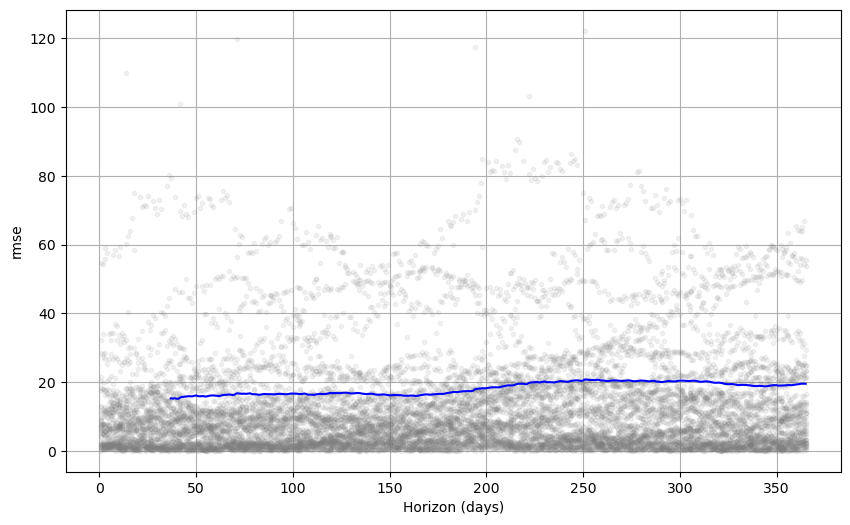

In [28]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv , metric = 'rmse')

In [29]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7765,2026-06-22,179.186473,169.028026,198.690173,174.621846,183.035062,4.231394,4.231394,4.231394,4.082012,4.082012,4.082012,0.149381,0.149381,0.149381,0.0,0.0,0.0,183.417867
7766,2026-06-23,179.245739,169.064792,198.035822,174.658512,183.110804,4.213364,4.213364,4.213364,4.058935,4.058935,4.058935,0.154429,0.154429,0.154429,0.0,0.0,0.0,183.459102
7767,2026-06-24,179.305004,167.156636,196.525707,174.695178,183.203172,4.054647,4.054647,4.054647,3.895309,3.895309,3.895309,0.159338,0.159338,0.159338,0.0,0.0,0.0,183.359651
7768,2026-06-25,179.364270,168.962250,197.450268,174.734587,183.290074,4.083302,4.083302,4.083302,3.919626,3.919626,3.919626,0.163676,0.163676,0.163676,0.0,0.0,0.0,183.447572
7769,2026-06-26,179.423535,169.049598,197.998791,174.774207,183.365154,3.993671,3.993671,3.993671,3.826615,3.826615,3.826615,0.167056,0.167056,0.167056,0.0,0.0,0.0,183.417206


In [30]:
# Filter only future dates
future_forecast = prediction[prediction["ds"] > df_1["ds"].max()]
print(future_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(15))


             ds        yhat  yhat_lower  yhat_upper
7405 2025-06-27  161.846943  148.046137  173.857116
7406 2025-06-28  142.498969  129.646784  154.675588
7407 2025-06-29  153.935669  139.990298  167.226829
7408 2025-06-30  162.275284  149.237562  175.371397
7409 2025-07-01  162.306320  149.924942  175.436263
7410 2025-07-02  162.195185  150.114817  175.070387
7411 2025-07-03  162.270597  150.135947  175.765843
7412 2025-07-04  162.227600  147.831848  175.195307
7413 2025-07-05  142.869550  130.610359  155.713085
7414 2025-07-06  154.297689  140.885466  167.328659
7415 2025-07-07  162.630828  149.762969  175.433910
7416 2025-07-08  162.657985  149.815164  176.536897
7417 2025-07-09  162.546005  150.453460  175.420831
7418 2025-07-10  162.623947  150.025473  175.426138
7419 2025-07-11  162.587094  149.777444  175.575445
